In [1]:
import json
import time
import pandas as pd
from os.path import expanduser
import sys
import os
import numpy as np
import glob

#os.chdir('pysd2cat')
#!{sys.executable} setup.py develop --user --uninstall
#!{sys.executable} setup.py develop --user 
#os.chdir(os.pardir)

from pysd2cat.analysis.correctness import compute_correctness_all, compute_correctness_with_classifier
from pysd2cat.data import pipeline 
from pysd2cat.analysis.live_dead_analysis import add_live_dead_test_harness

%load_ext autoreload
%autoreload 2



In [3]:
## Get the data
#ex_id = 'experiment.transcriptic.r1c5va879uaex_r1c639xp952g4'
ex_id = 'experiment.transcriptic.r1c5vad8u7ve2_r1c66q7cru28u'
samples = pipeline.get_experiment_samples(ex_id, 'FCS')
sample_records = pipeline.get_metadata_dataframe(samples).drop_duplicates()
df = pipeline.get_xplan_data_and_metadata_df(sample_records, '', max_records=300)
df = add_live_dead_test_harness(df)


os.environ: environ({'CAML_LD_LIBRARY_PATH': '/Users/danbryce/.opam/system/lib/stublibs:/usr/local/lib/ocaml/stublibs', 'MANPATH': ':/Users/danbryce/.opam/system/man:/Users/danbryce/.opam/system/man', 'TERM_PROGRAM': 'Apple_Terminal', 'UDG_HOME': '/Applications/uDrawGraph-3.1', 'ACL_HOME': '/Applications/AllegroCL32.app/Contents/Resources', 'TERM': 'xterm-color', 'SHELL': '/bin/bash', 'TMPDIR': '/var/folders/p9/447mgxs91h11vkvs2fgb8xd00000gn/T/', 'PERL5LIB': '/Users/danbryce/.opam/system/lib/perl5:/Users/danbryce/.opam/system/lib/perl5:', 'Apple_PubSub_Socket_Render': '/private/tmp/com.apple.launchd.iYvP8nQWpF/Render', 'TERM_PROGRAM_VERSION': '421.2', 'TERM_SESSION_ID': '04C985D5-5DC9-4F97-BE2B-39FB4A105955', 'OCAML_TOPLEVEL_PATH': '/Users/danbryce/.opam/system/lib/toplevel', 'HACKAR_HOME': '/Users/danbryce/Documents/sift/hackar/code/', 'SVN_EDITOR': 'xemacs', 'USER': 'danbryce', 'LD_LIBRARY_PATH': '/opt/local/lib/:/usr/X11R6/lib:/System/Library/Tcl/8.4/Img-1.3', 'CIRCA_BASENAME': 'dbr

KeyError: 'filename'

In [88]:
## Calculate different measures on data
correctness_df = compute_correctness_all(df, high_control='NOR 00 Control')


/home/jupyter/tacc-work/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 03:02:08
Normalizing training and testing splits...
Starting Classification training...
Training time was: 10.14 seconds
Testing time was: 0.63 seconds
Prediction time of untested data was: 67.14245843887329

          Run ID        Date      Time                    Model Name Model Author  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used                                       Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  Q63Rv825592R3  2019-06-02  03:02:08  random_forest_classification  Hamed        0.977     0.976              0.996      0.996              0.974     0.979      0.969   43448     

/home/jupyter/tacc-work/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 03:19:18
Normalizing training and testing splits...
Starting Classification training...
Training time was: 6.18 seconds
Testing time was: 0.63 seconds
Prediction time of untested data was: 50.0169632434845

          Run ID        Date      Time                    Model Name Model Author  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used                                            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  56dRYMxBe1zkw  2019-06-02  03:19:18  random_forest_classification  Hamed        0.975     0.973              0.995      0.994              0.969     0.974      0.964   40589  

In [89]:
#pd.read_html('test_harness_results/custom_classification_leaderboard.html')
from IPython.display import HTML

HTML(filename='test_harness_results/custom_classification_leaderboard.html')

Run ID,Date,Time,Model Name,Model Author,Accuracy,Balanced Accuracy,AUC Score,Average Precision,F1 Score,Precision,Recall,Samples In Train,Samples In Test,Model Description,Column Predicted,Num Features Used,Data and Split Description,Normalized,Num Features Normalized,Feature Extraction,Was Untested Data Predicted
55WqMPRkOMpA2,2019-06-02,02:44:24,random_forest_classification,Hamed,0.993,0.991,0.999,1.000,0.995,0.994,0.996,33351,8338,"Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1",class_label,12,experiment.transcriptic.r1c5vad8u7ve2_r1c66q7cru28u_live,True,12,False,True
Q63Rv825592R3,2019-06-02,03:02:08,random_forest_classification,Hamed,0.977,0.976,0.996,0.996,0.974,0.979,0.969,43448,10863,"Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1",class_label,12,experiment.transcriptic.r1c5vad8u7ve2_r1c66q7cru28u_correctness,True,12,False,True
56dRYMxBe1zkw,2019-06-02,03:19:18,random_forest_classification,Hamed,0.975,0.973,0.995,0.994,0.969,0.974,0.964,40589,10148,"Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1",class_label,12,experiment.transcriptic.r1c5vad8u7ve2_r1c66q7cru28u_correctness_live,True,12,False,True


Text(0, 0.5, 'threshold_live')

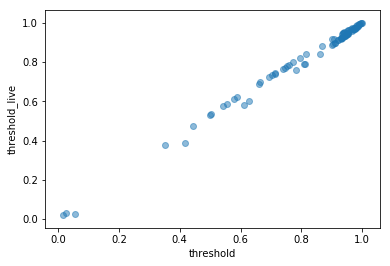

In [90]:
%matplotlib inline
import matplotlib.pyplot as plt

ax = plt.axes()
ax.scatter(correctness_df['mean_correct_threshold'], correctness_df['mean_correct_threshold_live'], alpha=0.5)
ax.set_xlabel('threshold')
ax.set_ylabel('threshold_live')



Text(0, 0.5, 'classifier_live')

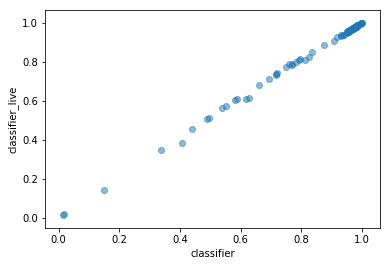

In [91]:
ax = plt.axes()
ax.scatter(correctness_df['mean_correct_classifier'], correctness_df['mean_correct_classifier_live'], alpha=0.5)
ax.set_xlabel('classifier')
ax.set_ylabel('classifier_live')



Text(0, 0.5, 'classifier_live')

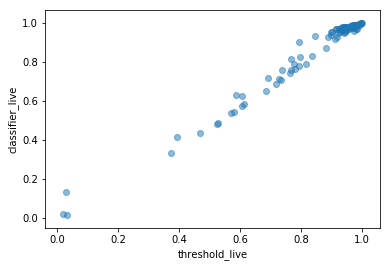

In [80]:
ax = plt.axes()
ax.scatter(correctness_df['mean_correct_threshold_live'], correctness_df['mean_correct_classifier_live'], alpha=0.5)
ax.set_xlabel('threshold_live')
ax.set_ylabel('classifier_live')



Text(0, 0.5, 'classifier')

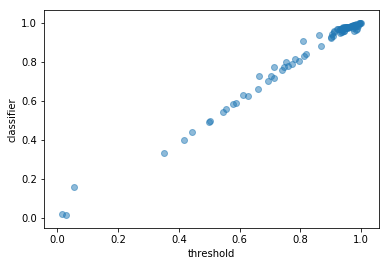

In [81]:
ax = plt.axes()
ax.scatter(correctness_df['mean_correct_threshold'], correctness_df['mean_correct_classifier'], alpha=0.5)
ax.set_xlabel('threshold')
ax.set_ylabel('classifier')

